# Abalone Age Prediction

In [113]:
import torch
import pandas as pd
from torch import nn
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

## Dataset

In [114]:
file_path = './data/abalone.csv'
df = pd.read_csv(file_path)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [115]:
df['Age'] = df['Rings'] + 1.5

df = df.drop(['Rings'], axis=1)

df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


## Data Analysis

In [116]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [118]:
# Get the shape of the data
df.shape

(4177, 9)

In [119]:
# Get the column names
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Age'],
      dtype='object')

In [120]:
# Count missing values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

In [121]:
# Select duplicated rows
df[df.duplicated()]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age


In [122]:
# Select categorical data, numerical data
categorical_data = df.select_dtypes(['object'])
numerical_data = df.select_dtypes(['float64', 'int64'])

categorical_data, numerical_data

(     Sex
 0      M
 1      M
 2      F
 3      M
 4      I
 ...   ..
 4172   F
 4173   M
 4174   M
 4175   F
 4176   M
 
 [4177 rows x 1 columns],
       Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
 0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
 1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
 2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
 3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
 4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
 ...      ...       ...     ...           ...             ...             ...   
 4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
 4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
 4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
 4175   0.625     0.485   0.150        1.0

In [123]:
df['Sex'].value_counts()

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

## Data visualization

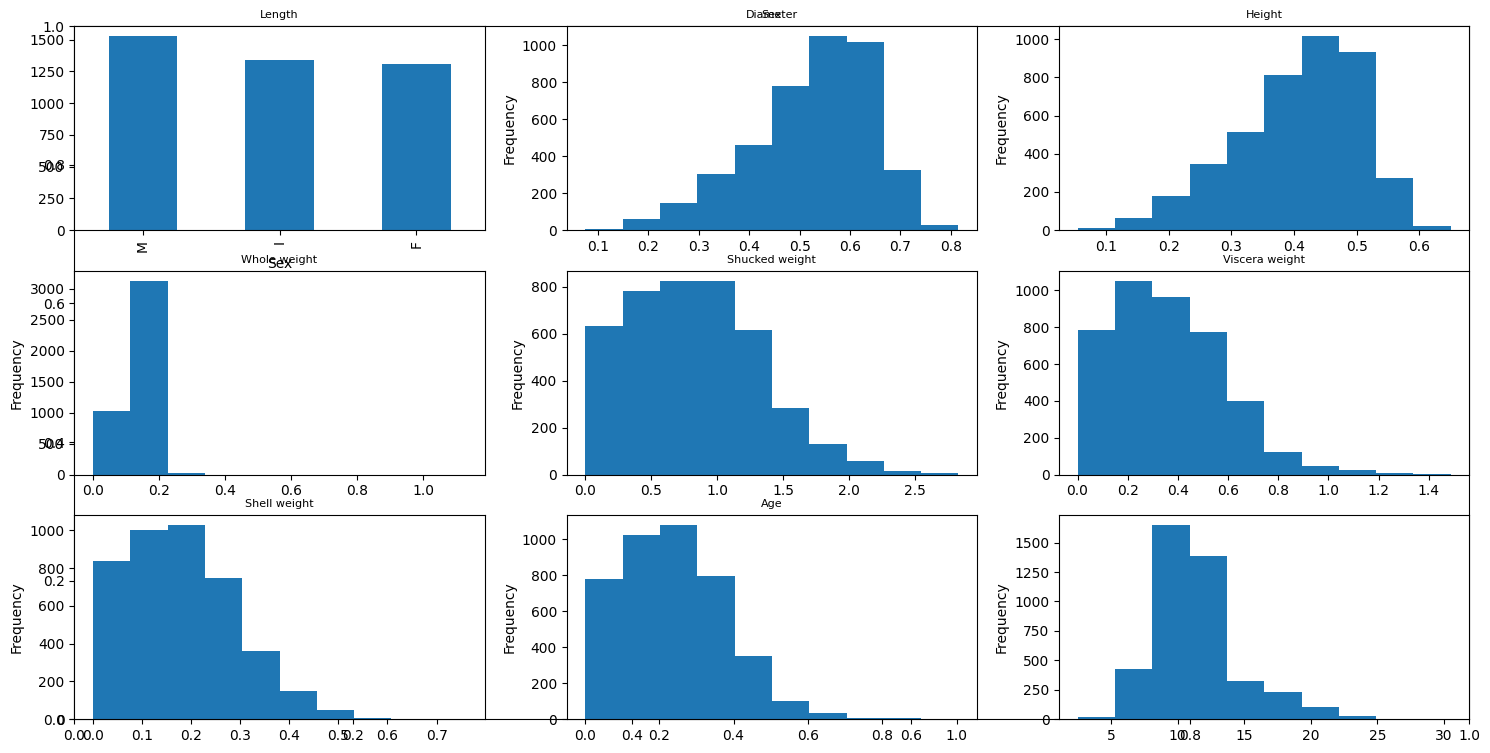

In [124]:
import matplotlib.pyplot as plt
# Plot age
plt.figure(figsize=(18, 9))
for i, col in enumerate(df.columns):
  plt.title(col, fontsize=8)
  plt.subplot(3, 3, i+1)
  if col == 'Sex':
    df[col].value_counts().plot.bar()
  else:
    df[col].plot.hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x2190cf5ae00>,
 'caps': [<matplotlib.lines.Line2D at 0x2190cf59ab0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2190cf586d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2190cf58a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x2190dbeab90>],
 'means': []}

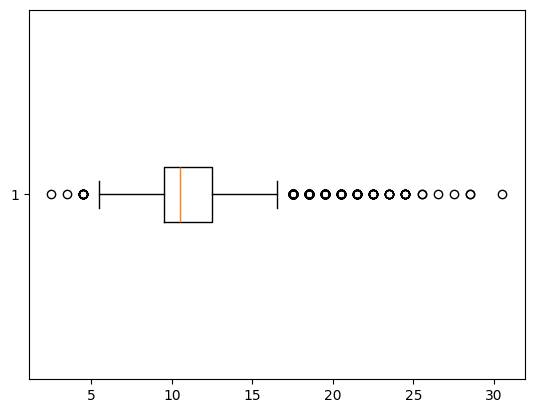

In [125]:
plt.boxplot(df['Age'], vert=False)

## Feature Correlation

In [126]:
pearson_corr = df.corr('pearson', numeric_only=True)
pearson_corr

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Age,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<Axes: >

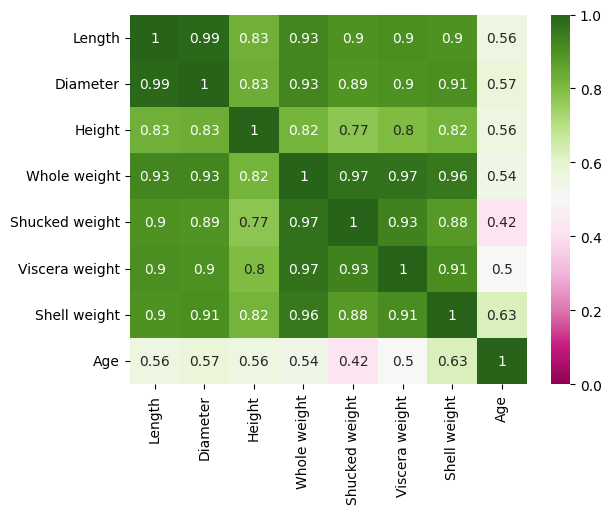

In [127]:
import seaborn as sns

sns.heatmap(pearson_corr, cmap='PiYG', annot=True, vmax=1, vmin=0)

## Cleaning Data

In [128]:
import numpy as np
def remove_outliers(df: pd.DataFrame):
  numerical_df = df.select_dtypes(include=np.number)
  Q1 = numerical_df.quantile(0.25)
  Q3 = numerical_df.quantile(0.75)
  IQR = Q3 - Q1
  
  outlier = ((numerical_df < (Q1 - 1.5 * IQR)) | (numerical_df > (Q3 + 1.5 * IQR))).any(axis=1)
  return df[~outlier]

df = remove_outliers(df)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


{'whiskers': [<matplotlib.lines.Line2D at 0x2190cb40c10>,
 'caps': [<matplotlib.lines.Line2D at 0x2190cb43d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x2190cb413f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2190cb41600>],
 'fliers': [<matplotlib.lines.Line2D at 0x2190cb42dd0>],
 'means': []}

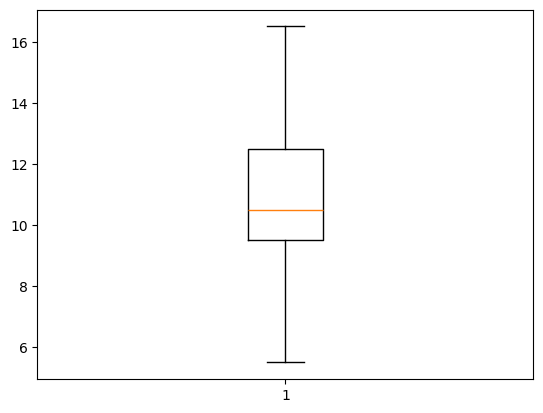

In [129]:
plt.boxplot(df['Age'])

## Data Encoding

In [134]:
df['Sex'].head()

0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object

In [138]:
from sklearn.preprocessing import OneHotEncoder

categorical_1h = OneHotEncoder(drop="first")
df_ = categorical_1h.fit_transform(categorical_data)
df_.toarray()

array([[0., 1.],
       [0., 1.],
       [0., 0.],
       ...,
       [0., 1.],
       [0., 0.],
       [0., 1.]])